In [2]:
import gifba
rel_abund = [0.5, 0.5]
iters = 100
step_size=1

# load models and media:
sim = "test"
models, media = gifba.utils.load_simple_models(sim)

# initialize community
community = gifba.gifbaObject(models, media, rel_abund=rel_abund)

# run iterations
# media_flux, org_flux = community.run_gifba(iters=iters, method="pfba", early_stop=True, v=True)
media_flux, org_flux = community.consist_check(iters=iters, method="pfba", early_stop=False, v=True)

Read LP format model from file /tmp/tmpf9te4xjh.lp
Reading time = 0.00 seconds
: 6 rows, 14 columns, 24 nonzeros
Read LP format model from file /tmp/tmpk7z9rv8n.lp
Reading time = 0.00 seconds
: 6 rows, 14 columns, 24 nonzeros
Iteration: 0
 Simulating model: 1  of  2
Ex_A [-20.]
Ex_C [-0.]
exchangeBio [-0.]
Objective value: 20.0
 Simulating model: 2  of  2
Ex_C [-0.]
Ex_A [-20.]
exchangeBio [-0.]
Objective value: 0.0
Iteration: 1
 Simulating model: 1  of  2
Ex_A [-20.]
Ex_C [-20.]
exchangeBio [-20.]
Objective value: 20.0
 Simulating model: 2  of  2
Ex_C [-20.]
Ex_A [-20.]
exchangeBio [-20.]
Objective value: 20.0
Ex_A over-consumed by factor of 2.0
 Simulating model: 1  of  2
Ex_A [-10.]
Ex_C [-20.]
exchangeBio [-20.]
Objective value: 10.0
 Simulating model: 2  of  2
Ex_C [-20.]
Ex_A [-10.]
exchangeBio [-20.]
Objective value: 10.0
Iteration: 2
 Simulating model: 1  of  2
Ex_A [-20.]
Ex_C [-10.]
exchangeBio [-20.]
Objective value: 20.0
 Simulating model: 2  of  2
Ex_C [-10.]
Ex_A [-20.]
e

In [6]:
print(community.biomass_exs)

['exchangeBio']


In [1]:
for idx, model in enumerate(models):
    print(idx, " of 2 models")
    for rxn in model.reactions:
        print(rxn.id, "  ", end="")
        for met in rxn.metabolites:
            if rxn.metabolites[met] < 0:
                print(f"{rxn.metabolites[met]}  {met.id}", end="    ")
        for met in rxn.metabolites:
            if rxn.metabolites[met] > 0:
                print(f"-> {abs(rxn.metabolites[met])}  {met.id}", end="    ")
        print()
    print()

NameError: name 'models' is not defined

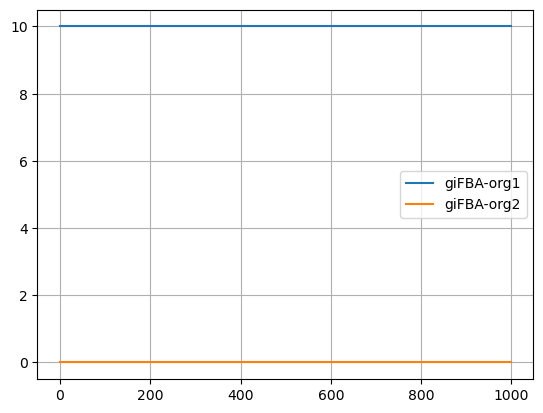

In [ ]:
import matplotlib.pyplot as plt
import numpy as np
plt.plot(community.org_fluxes.loc[0,"exchangeBio1"], label='giFBA-org1')
plt.plot(community.org_fluxes.loc[1,"exchangeBio2"], label='giFBA-org2')
plt.legend()
plt.grid()
plt.show()




In [5]:
community.env_fluxes

,exchangeBio,Ex_A,Ex_C
Iteration,,,
0,0.0,10.0,0.000000
1,10.0,10.0,10.000000
2,10.0,10.0,8.000000
3,10.0,10.0,8.333333
4,10.0,10.0,8.275862
...,...,...,...
96,10.0,10.0,8.284271
97,10.0,10.0,8.284271
98,10.0,10.0,8.284271


In [6]:
community.org_fluxes

,,exchangeBio,T_A,T_Biomass,Ex_C,Biomass,Ex_A,T_C
Model,Iteration,,,,,,,
0,0,10.000000,10.000000,10.000000,10.000000,10.000000,-10.000000,10.000000
1,0,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
0,1,8.000000,8.000000,8.000000,8.000000,8.000000,-8.000000,8.000000
1,1,2.000000,2.000000,2.000000,-2.000000,2.000000,-2.000000,2.000000
0,2,8.333333,8.333333,8.333333,8.333333,8.333333,-8.333333,8.333333
...,...,...,...,...,...,...,...,...
1,97,1.715729,1.715729,1.715729,-1.715729,1.715729,-1.715729,1.715729
0,98,8.284271,8.284271,8.284271,8.284271,8.284271,-8.284271,8.284271
1,98,1.715729,1.715729,1.715729,-1.715729,1.715729,-1.715729,1.715729


In [4]:
community.summarize()

Metabolite,Exchange,Flux,C-Number,C-Flux
C_e,Ex_C,10.0,0,0.00%
bio2e,exchangeBio,90.0,0,0.00%
Metabolite,Exchange,Flux,C-Number,C-Flux
A_e,Ex_A,5.0,0,0.00%
Metabolite,Exchange,Flux,C-Number,C-Flux
C_e,Ex_C,5.0,0,0.00%
bio2e,exchangeBio,5.0,0,0.00%
Metabolite,Exchange,Flux,C-Number,C-Flux
A_e,Ex_A,5.0,0,0.00%
C_e,Ex_C,5.0,0,0.00%
